In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Setando o estilo padrão para o do Seaborn
sns.set_theme()

Antes de qualquer coisa, vamos entender nossas variáveis. Inicialmente, vamos 
checar os tipos e verificar se eles exigem alguma mudança, assim, conseguiremos 
analisar os dados da maneira correta.

In [12]:
# Lendos os dados
data_fraud = pd.read_csv("../data/raw/dados - dados.csv")

In [13]:
# Checando os tipos
data_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   score_1              150000 non-null  int64  
 1   score_2              137016 non-null  float64
 2   score_3              137016 non-null  float64
 3   score_4              149635 non-null  float64
 4   score_5              150000 non-null  float64
 5   score_6              149989 non-null  float64
 6   pais                 149806 non-null  object 
 7   score_7              150000 non-null  int64  
 8   produto              150000 non-null  object 
 9   categoria_produto    150000 non-null  object 
 10  score_8              150000 non-null  float64
 11  score_9              149989 non-null  float64
 12  score_10             149635 non-null  float64
 13  entrega_doc_1        150000 non-null  int64  
 14  entrega_doc_2        41143 non-null   object 
 15  entrega_doc_3    

De acordo com os resultados, todas as colunas estão com o formato correto, com 
exceção da coluna ```data_compra```, que deve ser alterada para **datetime**, e
da coluna **entrega_doc_1**, que por padrão deveria ser categórica, mas já está
codificada. 

In [14]:
# Alterando o tipo das variáveis
data_fraud["data_compra"] = pd.to_datetime(data_fraud["data_compra"])

data_fraud["entrega_doc_1"] = data_fraud["entrega_doc_1"].astype("object")
data_fraud["entrega_doc_1"] = data_fraud["entrega_doc_1"].map({0:"N", 
                                                               1:"Y"})

In [15]:
data_fraud

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,score_8,score_9,score_10,entrega_doc_1,entrega_doc_2,entrega_doc_3,data_compra,valor_compra,score_fraude_modelo,fraude
0,4,0.7685,94436.24,20.0,0.444828,1.0,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,cat_8d714cd,0.883598,240.0,102.0,Y,NaN,N,2020-03-27 11:51:16,5.64,66,0
1,4,0.7550,9258.50,1.0,0.000000,33.0,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,cat_64b574b,0.376019,4008.0,0.0,Y,Y,N,2020-04-15 19:58:08,124.71,72,0
2,4,0.7455,242549.09,3.0,0.000000,19.0,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,cat_e9110c5,0.516368,1779.0,77.0,Y,NaN,N,2020-03-25 18:13:38,339.32,95,0
3,4,0.7631,18923.90,50.0,0.482385,18.0,BR,23,Caneta Delineador Carimbo Olho Gatinho Longo 2...,cat_d06e653,0.154036,1704.0,1147.0,Y,NaN,Y,2020-04-16 16:03:10,3.54,2,0
4,2,0.7315,5728.68,15.0,0.000000,1.0,BR,2,Resident Evil Operation Raccoon City Ps3,cat_6c4cfdc,0.855798,1025.0,150.0,Y,NaN,N,2020-04-02 10:24:45,3.53,76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,4,0.8191,21393.63,7.0,0.000000,1.0,BR,4,Aparelho Lipocavitação Ultrassônico + Gel Cond...,cat_a5b2091,0.808366,2009.0,434.0,Y,NaN,N,2020-04-11 19:31:07,47.15,95,0
149996,4,NaN,NaN,24.0,0.384615,11.0,UY,20,"Sellos De Goma Automaticos, Personalizados.",cat_e39ab7e,0.989981,499.0,135.0,Y,NaN,Y,2020-03-11 20:21:35,9.69,0,0
149997,4,NaN,NaN,3.0,0.477778,1.0,BR,19,Hélice 3 Pás Alumínio Rabeta 6.5 Hp Pesca Barc...,cat_ee6ecc8,0.763939,127.0,127.0,Y,NaN,Y,2020-03-11 19:36:07,5.97,15,0
149998,4,0.6067,152906.86,1.0,0.099175,133.0,BR,3,Tela Display Lcd Galaxy J7 Neo J701 Com Brilho...,cat_237e2d0,0.382728,4373.0,123.0,Y,NaN,Y,2020-03-16 07:13:24,25.83,59,0


Agora que aplicamos a alteração com sucesso, vamos explorar as variáveis. 

## Análise Univariada 

De inicio, irei verificar os dados fornecidos pela função **describe** do pandas.

In [16]:
data_fraud.describe()

,score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10,data_compra,valor_compra,score_fraude_modelo,fraude
count,150000.000000,137016.000000,1.370160e+05,149635.000000,150000.000000,149989.000000,150000.000000,150000.000000,149989.000000,149635.000000,150000,150000.000000,150000.000000,150000.000000
mean,3.705407,0.728115,2.604451e+05,21.677669,0.220641,51.169352,14.193513,0.497532,2305.409403,299.969579,2020-03-30 23:41:40.546252800,43.523134,48.066240,0.050000
min,1.000000,0.000000,1.600000e-01,0.000000,0.000000,-5.000000,0.000000,0.000004,0.000000,0.000000,2020-03-08 00:02:15,0.020000,0.000000,0.000000
25%,4.000000,0.678400,9.679915e+03,2.000000,0.000000,1.000000,3.000000,0.246819,910.000000,42.000000,2020-03-18 12:40:32.249999872,9.380000,23.000000,0.000000
50%,4.000000,0.755500,4.371165e+04,14.000000,0.104875,8.000000,9.000000,0.495990,1937.000000,193.000000,2020-03-31 00:08:33,20.610000,48.000000,0.000000
75%,4.000000,0.806500,1.454436e+05,50.000000,0.282938,33.000000,21.000000,0.746508,3445.000000,459.000000,2020-04-12 12:40:16,40.692500,73.000000,0.000000
max,4.000000,1.000000,1.387874e+07,50.000000,833.333333,145274.000000,58.000000,0.999995,7544.000000,2225.000000,2020-04-21 23:59:56,3696.350000,100.000000,1.000000
std,0.753206,0.132943,8.464361e+05,20.062146,2.434995,709.472904,14.161216,0.288348,1712.379601,321.075806,NaN,91.557888,28.995122,0.217946


- Os nossos dados compreendem o período entre 18-03-20 e 21-04-20.
- O valor médio das compras é de R$48.06, sendo influenciado por valores
discrepantes, já que sua mediana é de apenas R$20.61.
- O valor do score fornecido pelo modelo é, em média, de 48%, estando bem
próximo do limiar de decisão (50%).

Agora, vamos verificar as distribuições das variáveis numéricas.

### Variáveis numéricas

In [17]:
# Selecionando as variáveis numéricas
num_vars = data_fraud.select_dtypes(["int", "float"]).columns

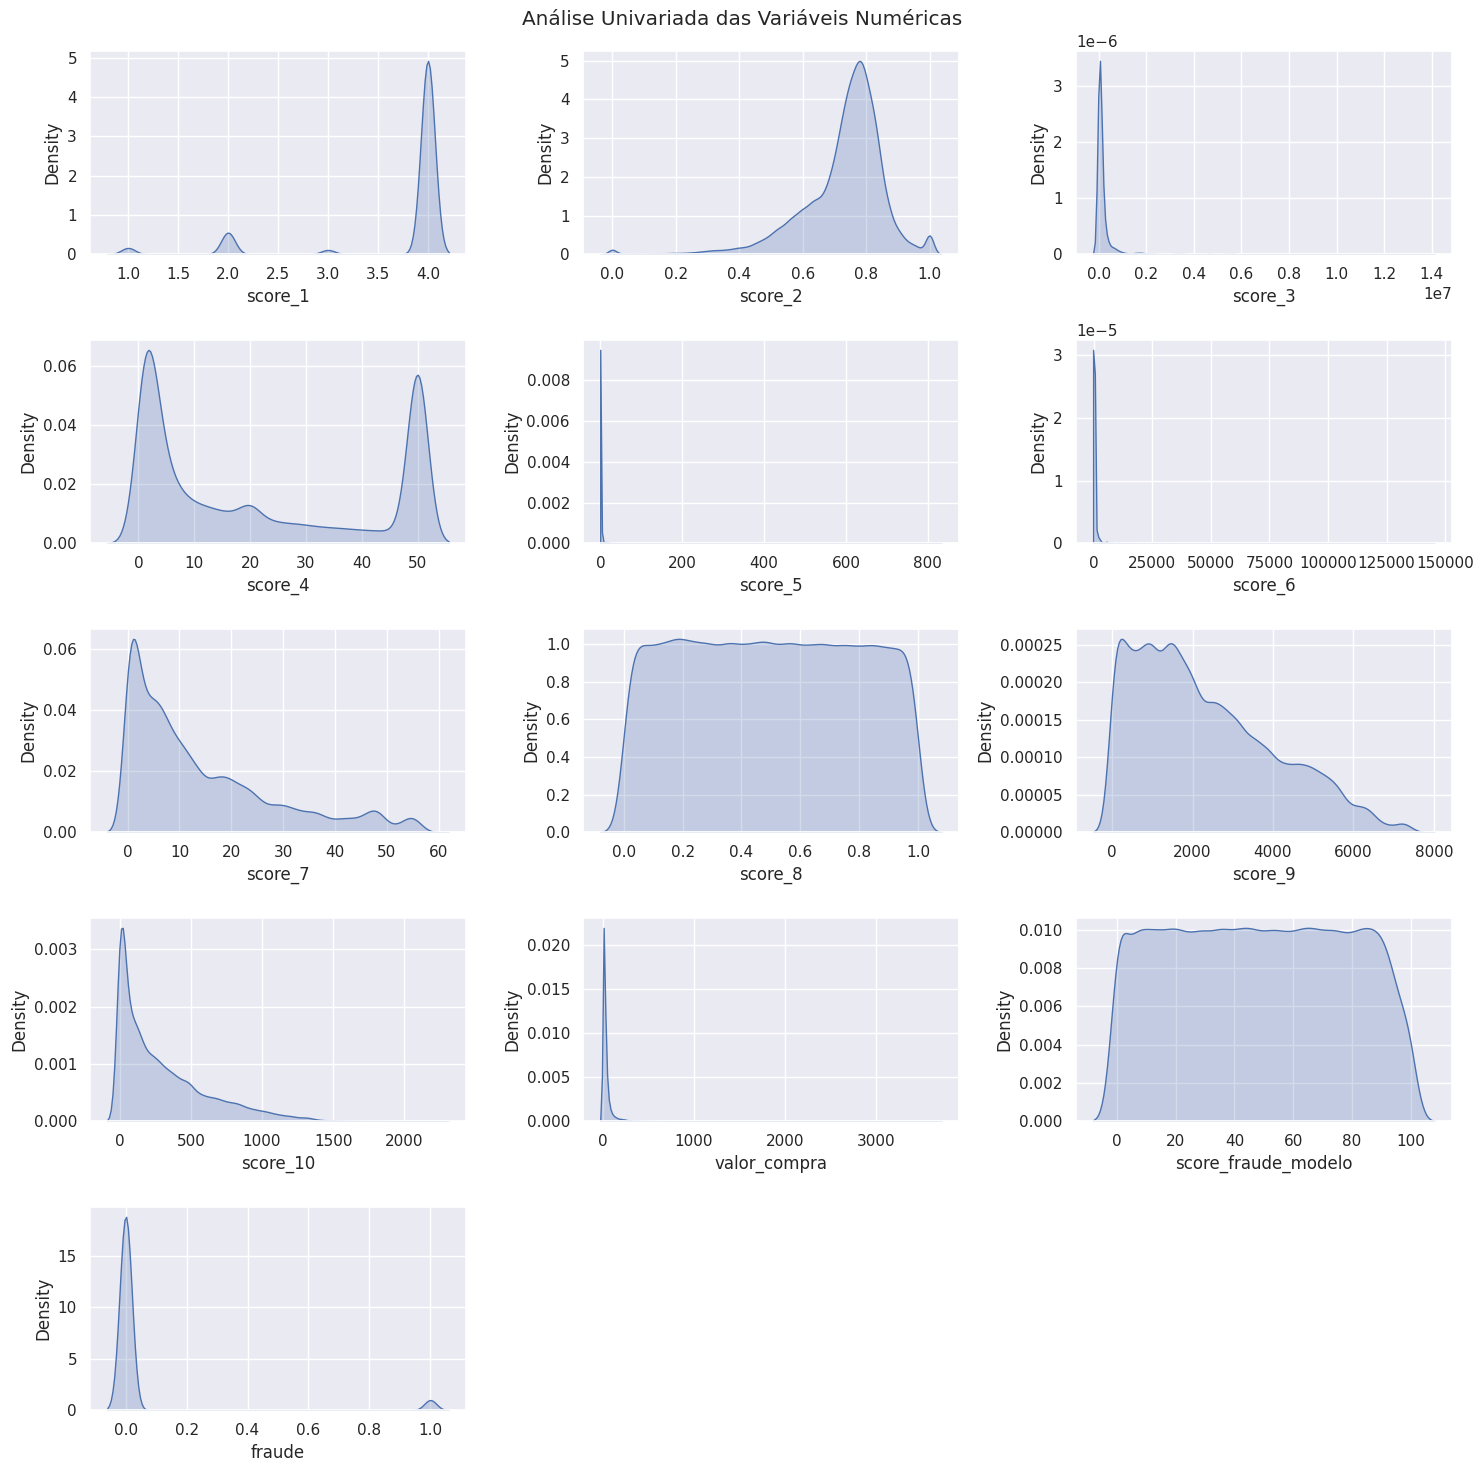

In [18]:
# Criando a figure principal
plt.figure(figsize=(15, 15))

# Setando o título
plt.suptitle("Análise Univariada das Variáveis Numéricas")

# Adicionando os subplots
for index in range(len(num_vars)):
    plt.subplot(5, 3, index+1)
    sns.kdeplot(data_fraud[num_vars[index]], fill=True, color="b")
    plt.xlabel(num_vars[index])
    plt.tight_layout()
    

- As variáveis **score 5** e **score 6** possuem valores que fogem totalmente da 
distribuição comum das outras variáveis de score. Além de isso indicar a presença
de outliers, é possível que esses outliers sejam provenientes de erro.

- Apesar da variável **score 3** possuir uma forma semelhante as variáveis 
citadas acima, a escala não é tão diferente, indicando que seus outliers podem 
ser naturais.

- O nossa variável target, **fraude**, está desbalanceada.

### Variáveis Categóricas

In [19]:
# Obtendo as variáveis categóricas
cat_vars = data_fraud.select_dtypes("object").columns

In [20]:
# Calculando a esparsidade de cada coluna
for col in cat_vars:
    col_sparsity = data_fraud[col].nunique()
    print(f"{col}: {col_sparsity} valores únicos")

pais: 51 valores únicos
produto: 127804 valores únicos
categoria_produto: 8324 valores únicos
entrega_doc_1: 2 valores únicos
entrega_doc_2: 2 valores únicos
entrega_doc_3: 2 valores únicos


As categorias **pais**, e em especial, **produto** e **categoria_produto**,
possuem alta dimensionalidade. Para investigar melhor essas variáveis, irei 
utilizar o método **value_counts** do pandas. Além disso, aplicar o 
OneHotEncoding futuramente pode não ser o ideal para elas.

As variáveis restantes serão plotadas em um gráfico para averiguar a
distribuição de seus valores.

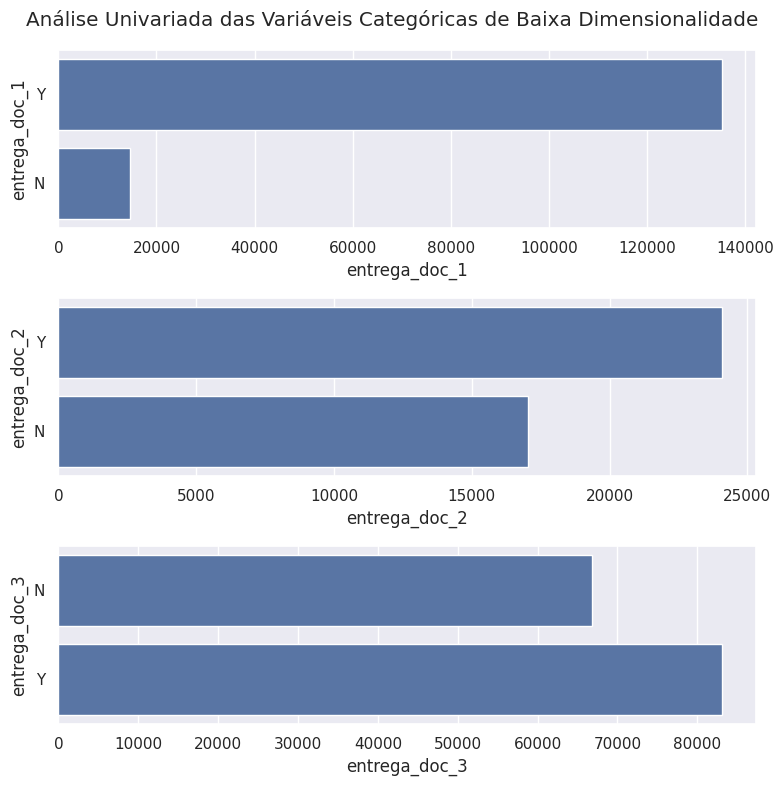

In [21]:
# Selecionando as variáveis para plot
cat_low_sparsity = [col for col in cat_vars if col not in ["pais", "produto", "categoria_produto"]]

# Definindo a figura
plt.figure(figsize=(8, 8))

# Setando o título
plt.suptitle("Análise Univariada das Variáveis Categóricas de Baixa Dimensionalidade")

# Plotando as variáveis
for index in range(len(cat_low_sparsity)):
    plt.subplot(3, 1, index+1)
    sns.countplot(data_fraud[cat_low_sparsity[index]])
    plt.xlabel(cat_low_sparsity[index])
    plt.tight_layout()

As variáveis **entrega_doc_2** e **entrega_doc_3** são bem semelhantes, estando
bem balanceadas. Já a coluna **entrega_doc_1** está desbaçlanceada, mas 
possuindo um bom número de itens da classe com menor presença (pouco mais de 12 
mil).

In [23]:
# Verificando se existem valores raros nas categorias com alta esparsidade
# - pais
data_fraud["pais"].value_counts()

pais
BR    111628
AR     31964
UY      2967
US      2273
SE       358
MX       236
RU        73
ES        69
CO        64
GB        43
FR        18
IT        14
PT        13
CL         9
DE         9
PE         5
PY         4
EC         4
AU         3
UA         3
CN         3
CA         3
BE         3
NZ         3
CH         3
PA         3
BO         2
LB         2
PR         2
NL         2
CR         2
AE         2
AD         1
GE         1
KR         1
IN         1
HN         1
NI         1
GR         1
DO         1
EG         1
TR         1
BS         1
PH         1
GH         1
TW         1
FI         1
NO         1
IL         1
JP         1
ZA         1
Name: count, dtype: int64

In [24]:
# Verificando se existem valores raros nas categorias com alta esparsidade
# - produto
data_fraud["produto"].value_counts()

produto
Fone De Ouvido Sem Fio Xiaomi Airdots Preto                     83
Xiaomi Redmi Note 8 Dual Sim 64 Gb Azul-netuno 4 Gb Ram         51
Clean Sept - Álcool Em Gel 70% 500 Ml                           49
Tapete Ilustrativo Pista Carrinho Hot Wheels 0,60x1,20m         47
Máscara Descartável Tripla Com Elástico Proteção Anvisa 50un    47
                                                                ..
Interruptor Lâmpada 3 Vias Canais Controle Wirells 110v/220v     1
Fone De Ouvido Para iPad iPhone 4s 5 5c 5s 6 6s Plus+ Brinde     1
2 Potes Moder Diet 500mg 100caps Total 200caps                   1
Pacote Master Revit Diamante + Extras + Brindes 2017 2020        1
Copita Menstrual Silicona Médica Importada Aneer                 1
Name: count, Length: 127804, dtype: int64

In [25]:
# Verificando se existem valores raros nas categorias com alta esparsidade
# - categoria_produto
data_fraud["categoria_produto"].value_counts()

categoria_produto
cat_43b9c10    2331
cat_d69bed9    1799
cat_604df77    1784
cat_6c4cfdc    1449
cat_4249bd8    1191
               ... 
cat_d6c71e0       1
cat_34ac07c       1
cat_4858280       1
cat_be3757f       1
cat_63704c0       1
Name: count, Length: 8324, dtype: int64

Todas as colunas com alta dimensionalidade possuem valores raros, o que pode 
ocasionar erros na hora de dividir os dados em treino/dev/teste. Para evitar 
isso, todas as categorias com um valor menor que x (valor a ser definido) serão 
combinadas. 

## Análise bivariada (variável x variável)

## Análise bivariada (variável x target)